<h1 style="color:red;">Question I</h1>

<p>
    The standard deviation of the original data is a measure giving us how spread out the dataset's values are from the mean. It allows us to define intervals with a certain percentage of the dataset's values included in it (68% within 1 s.d. and 95% at a distance of 2 s.d.s).
</p>
<p>
    The standard error of the mean, on the other hand, is the standard deviation of the distribution of the sample means, which we got during the bootstrapping process.
</p>
<p>
    So in short, the difference between the two is that the standard deviation of the original data tells us about the spread of values in the original dataset (so it shows how much variation there is in the dataset itself), while the standard error of the mean conveys information about how much the sample's mean is expected to vary from the population's mean.
</p>

<h1 style="color:red;">Question II</h1>

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

<p>
    To calculate the 95% confidence interval, first, we have to calculate the sample mean, and the standard error of the mean SEM, which is calculated by<br/> \( \text{SEM} = \frac{s}{ \sqrt{n}}\) where \(s\) is the standard deviation of our sample and \(n\) is the size of said sample.
    <br/><br/>With that, we can then calculate the confidence interval with the formula: <br>
    \( \bar{x} \pm(1.96 \cdot \text{SEM})\)
 <br>So the confidence interval will be delimited by the two values given by said formula.
</p>

<h1 style="color:red;">Question III</h1>

<p>
    The 95% confidence interval is simply a range covering 95% of the bootstrapped sample means. The histogram of bootstrapped sample means tends to be normal, in which case the best way to find 95% of the data in the smallest interval is in the middle of the dataset.
    <br/>Thus, we will be going from the 2.5th percentile to the 97.5th percentile to find the 95% we are looking for.
    <br/> We can get a list containing both limits of the interval using the following code:
</p>

In [5]:
import numpy as np
def confidence_95(sample_mean_list):
    interval = [np.quantile(sample_mean_list, 0.025),
                np.quantile(sample_mean_list, 0.975)]
    return interval

<head>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
</head>
<body>
Chatbot discussion summary for the above question:
Sure! Here's a summary of our discussion:
<ol>
<li>
    <h3>Standard Error and Confidence Intervals:</h3>
    <ul>
        <li>
        To create a 95% confidence interval using the standard error of the mean (SEM), you calculate it as \(\text{SEM} = \frac{s}{\sqrt{n}}\), where \(s\) is the sample standard deviation and \(n\) is the sample size. The confidence interval is then given by \(\bar{x} \pm (1.96 \times \text{SEM})\).
        </li>
        <li>
            The SEM is based on the sample's variability and measures how much the sample mean is expected to vary.
        </li>
    </ul>
</li>
<br/>
    
<li>
<h3>Histogram of Bootstrapped Sample Means:</h3>
    <ul><li>
   The histogram of bootstrapped sample means tends to approximate a normal distribution due to the Central Limit Theorem, particularly for large sample sizes. However, this might not be the case if the sample size is small or the original data is highly skewed.
    </ul></li>
</li>

<br/>
<li>
<h3>Bootstrapped Confidence Intervals:</h3>
    <ul>
   <li>You can create a 95% confidence interval using bootstrapped sample means without relying on the standard error. Instead, take the interval from the 2.5th percentile to the 97.5th percentile of the bootstrapped sample means. This range covers approximately 95% of the bootstrapped values.</li>
   <li>We provided Python code to compute this interval using `numpy`.</li>
    </ul>

</li>
</ol>
<br/>
These points clarify how confidence intervals can be constructed from both SEM and bootstrapped data, showing different approaches to measure the variability and reliability of sample statistics.

</body>

<h1 style="color:red;">Question IV</h1>

In [1]:
import numpy as np

# Your data
def median_confidence95(data):
    data = np.array([data])
    
    # Number of bootstrap samples
    n_bootstrap = 10000
    medians = []
    
    # Bootstrapping process
    for i in range(n_bootstrap):
        resample = np.random.choice(data, size=len(data), replace=True)
        medians.append(np.median(resample))
    
    # Calculating the 95% confidence interval
    lower_bound = np.percentile(medians, 2.5)
    upper_bound = np.percentile(medians, 97.5)
    interval = [lower_bound, upper_bound]
    print(f"95% Confidence Interval for the median: ({lower_bound}, {upper_bound})")
    return interval

<p>
    Here is a summary of my discussion with <a href="https://chatgpt.com/share/66fc87f8-c570-8002-a463-18e655840b91">ChatGPT</a>:
</p>

To create a bootstrapped 95% confidence interval for a median, you can follow these steps:

1. **Resample your data**: Take random samples from your dataset with replacement, matching the original size.
2. **Calculate the median**: Compute the median for each bootstrap sample.
3. **Repeat**: Perform the resampling and median calculation many times (e.g., 1,000 or 10,000 times).
4. **Construct the confidence interval**: Sort the medians from the bootstrap samples and take the 2.5th and 97.5th percentiles as the lower and upper bounds of the confidence interval.

A Python code example was provided to illustrate the process.

<h1 style="color:red;">Question V</h1>

The population parameter is a fixed value describing the whole population.
Meanwhile, the sample statistic is an estimation of said parameter based on a limited sample of the total population, which can be different based on the chosen sample.

<h1 style="color:red;">Question VI</h1>

<ol>
    <li>
        Okay so imagine you want to study something to find a certain trend. The best way to do this would be to make LOTS of tests on many people to have the closest thing possible to how it would fare if we'd tested it on the whole population, on everybody. However, there's a problem with that: it would be way too expensive! So what we do is we use a process called bootstrapping. We take a certain part of the population, called a sample, and test them. Let's say we tested 100 people. Then, we are going to randomly pick the results given by 1 person 100 times, by making it possible to take the same result more than once. By doing this, we get a new dataset. Then we do this over and over and over again and we compare the statistics of every new dataset we have to approximate what that value would be if we'd studied the whole population.
        <br/>That's what bootstrapping is!!
    </li>
    <li>
        So as I said, bootstrapping is used when you only tested a small group and want to see what the data would look like if you tested all of the population by creating lots of "new" datasets.
        <br/>By seeing how much some results change between these "new" datasets, you can estimate how much a statistic would vary in the population compared to the sample. With this, we can calculate confidence intervals to estimate the true trends and values in the population
    </li>
    <li>
        So you know how I said you could see how much a statistic varies between the bootstrapped datasets to estimate an interval in which that statistic is? Well you can do that with averages. You look at all the averages in the "new" bootstrapped datasets and you see how much they vary. With this, you can calculate something called the "95% confidence interval." It is a range that contains 95% of the averages (for example) of the datasets, and it give us this interval. And we say that we are 95% confident that it contains the real average. So by seeing if our guess is in that interval, we can assume whether or not it's plausible.
    </li>
</ol>

<h1 style="color:red;">Question VII</h1>

<p>
    This goes back to the definition of the confidence interval and the reason we use bootstrapping. From our sample, we want to try to estimate what a population parameter is using data from our sample. And the 95% confidence interval is an interval within which we are 95% confident the parameter lies.
    <br/>Thus, if the 95% confidence interval overlaps with zero, we cannot rule out the possibility of the average being zero (meaning the drug has no effect on average). After all, we are 95% confident that the average being zero is a possibility! Since the average being zero is plausible, we can't reject the null hypothesis.
</p>

<h1 style="color:red;">Question VIII</h1>

<h3>Introduction:</h3>
<p>
    The company AliTech has created a new vaccine and we want to see wheter it is effective or not using the data given to us. In the given sample, released by AliTech, the most interesting data points for us are the InitialHealthScore and FinalHealthScore columns.
    <br/>To see the difference in health before and after the vaccine, we can use the difference FinalHealthScore - InitialHealthScore. So we will calculate this difference for every patient, giving us the evolution of their health before/after the vaccine.
    <br/>In this case, the Null Hypothesis of "no effect" would be if the vaccine has no effect on average. on the patients' health, i.e. if the mean difference in health before and after the vaccine is equal to 0.
</p>

<h3>Quantitative Analysis:</h3>

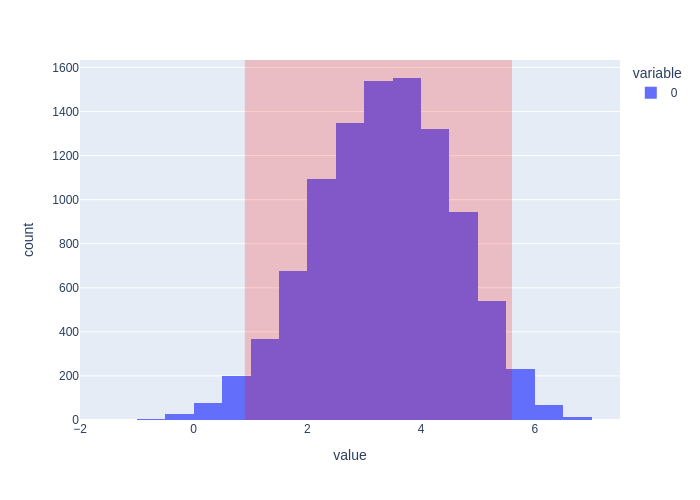

The 95% confidence interval is between 0.9 and 5.6


In [53]:
# We import the pandas and numpy modules
import pandas as pd
import numpy as np
import plotly.express as px

# We define a numpy seed to reproduce the same results
np.random.seed(157)

file_path = "./HW4.csv"  # Insert the csv file here

#We read the csv file and make a dataframe out of it
file = pd.read_csv(file_path)

# n is the number of rows, the original sample size
n = file.shape[0]

health_array = np.zeros(n)
for i in range(n):
    initial_health = file["InitialHealthScore"].iloc[i]
    final_health = file["FinalHealthScore"].iloc[i]
    health_array[i] =  final_health - initial_health

# This is the number of bootstraps we'll do
bootstrap_samples = 10000

# We make an array of size bootstrap_samples filled with zeros
xbar_bootstrapped = np.zeros(bootstrap_samples)


#We will make bootstrap samples
for i in range(bootstrap_samples):
    #We create a bootstrapped sample
    simulated_sample = file.sample(n=n, replace=True)

    # We create an array containing 
    # the difference FinalHealth - InitialHealth
    health_array = np.zeros(n)
    for j in range(n):
        initial_health = simulated_sample["InitialHealthScore"].iloc[j]
        final_health = simulated_sample["FinalHealthScore"].iloc[j]
        health_array[j] =  final_health - initial_health
        
    # We calculate the bootstrapped sample's mean
    # and add it to x_bootstrapped
    xbar_bootstrapped[i] = health_array.mean()

# We convert the array into a dataframe
xbar_bootstrapped = pd.DataFrame(xbar_bootstrapped)

# We will now find the 95% confidence interval:
lower_bound = np.percentile(xbar_bootstrapped, 2.5)
upper_bound = np.percentile(xbar_bootstrapped, 97.5)
interval = [lower_bound, upper_bound]

# We make the histogram
fig = px.histogram(xbar_bootstrapped, nbins = 20)
# We graphically add the 95% confidence interval to the figure
fig.add_vrect(lower_bound, upper_bound,
              line_width = 0, fillcolor = "red", opacity = 0.2)
fig.show(renderer = 'png')
print(f"The 95% confidence interval is between \
{lower_bound} and {upper_bound}")


<h3>Findings and discussions</h3>
<p>
    As we can see fromm the results of the above code, the 95% confidence interval of the sample's mean of differences in health does not cover 0, it is actually positive (0.9 to 5.6 with the seed I've set.
    <br/><br/>We are 95% confident that the mean of differences in health of the whole population does not contain 0 and is in fact positive.
    <br/>We can conclude by saying that we can overrule the null hypothesis of "no effect" by saying that the vaccine is in fact effective.
</p>
<p>
    Now since the sample size we have used is quite small (10 patients), it is still possible that the sample is not representative of the overall population, due to maybe starting a healthier lifestyle right after the vaccine or another similar reason.
</p>